# Converting Un-structured cropped face data to structured data for data preprocessing 

<b>Import required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob

%matplotlib inline

<b>Import the cropped images<b>

In [2]:
male = glob('./Data/Crop/Male-Crop/*.png')
female = glob('./Data/Crop/Female-Crop/*.png')

In [5]:
path = male + female

<b>Check Image size<b>

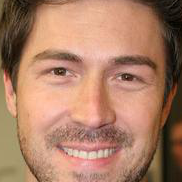

In [8]:
img = Image.open(path[0])
img

In [9]:
img.size

(182, 182)

In [12]:
#Define a function to get the size of each image
#As seen from above, we are getting size as a square matrix (182, 182). Hence we will return only 1 value

def get_size(path):
    img = Image.open(path)
    #return img.size
    return img.size[0]

In [13]:
get_size(path[1])

81

<b>Load Image data into a pandas DataFrame<b>

In [15]:
df = pd.DataFrame(data=path,columns=['Path'])
df.head()

,Path
0,./Data/Crop/Male-Crop\male_0.png
1,./Data/Crop/Male-Crop\male_1.png
2,./Data/Crop/Male-Crop\male_1003.png
3,./Data/Crop/Male-Crop\male_1005.png
4,./Data/Crop/Male-Crop\male_1007.png


<b>Add a new column corresponding to the size of each face image<b>

In [17]:
df['Size'] = df['Path'].apply(get_size)
df.head()

,Path,Size
0,./Data/Crop/Male-Crop\male_0.png,182
1,./Data/Crop/Male-Crop\male_1.png,81
2,./Data/Crop/Male-Crop\male_1003.png,81
3,./Data/Crop/Male-Crop\male_1005.png,122
4,./Data/Crop/Male-Crop\male_1007.png,273


In [18]:
df.tail()

,Path,Size
6048,./Data/Crop/Female-Crop\female_994.png,182
6049,./Data/Crop/Female-Crop\female_995.png,81
6050,./Data/Crop/Female-Crop\female_997.png,122
6051,./Data/Crop/Female-Crop\female_998.png,182
6052,./Data/Crop/Female-Crop\female_999.png,182


<b>Do Exploratory Data Analysis<b>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6053 entries, 0 to 6052
Data columns (total 2 columns):
Path    6053 non-null object
Size    6053 non-null int64
dtypes: int64(1), object(1)
memory usage: 94.7+ KB


In [21]:
df.columns

Index(['Path', 'Size'], dtype='object')

In [22]:
df.describe()

,Size
count,6053.000000
mean,155.638361
std,72.296008
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Size,6053.0,155.638361,72.296008,24.0,81.0,122.0,182.0,410.0


<b>Visualize data using plots<b>

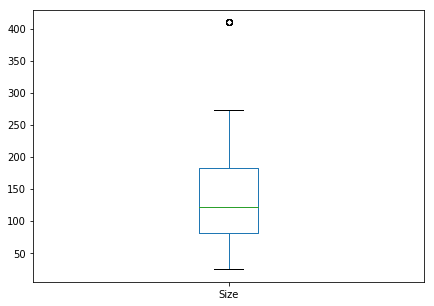

In [26]:
plt.figure(figsize=(7,5))
df['Size'].plot(kind='box')

In [29]:
import seaborn as sns

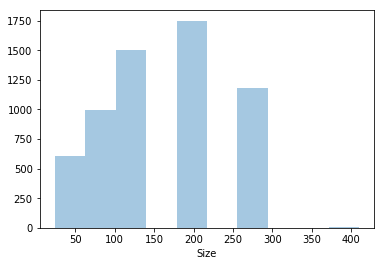

In [38]:
sns.distplot(df['Size'], bins=10, kde=False)

(array([   9.,  600.,  997.,    0.,    0., 1505.,    0.,    0., 1750.,
           0.,    0.,    0., 1184.,    0.,    0.,    0.,    0.,    0.,
           0.,    8.]),
 array([ 24. ,  43.3,  62.6,  81.9, 101.2, 120.5, 139.8, 159.1, 178.4,
        197.7, 217. , 236.3, 255.6, 274.9, 294.2, 313.5, 332.8, 352.1,
        371.4, 390.7, 410. ]),
 <a list of 20 Patch objects>)

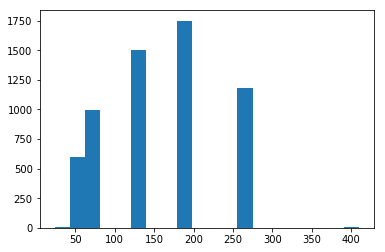

In [40]:
plt.hist(df['Size'], bins=20)

<b>Removing Images of size less than 60<b>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6053 entries, 0 to 6052
Data columns (total 2 columns):
Path    6053 non-null object
Size    6053 non-null int64
dtypes: int64(1), object(1)
memory usage: 94.7+ KB


In [43]:
new_df = df[df['Size']>60]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5444 entries, 0 to 6052
Data columns (total 2 columns):
Path    5444 non-null object
Size    5444 non-null int64
dtypes: int64(1), object(1)
memory usage: 127.6+ KB


<b>Calculate no of male and female samples<b>

In [49]:
sample = new_df['Path'][0]
sample

def gender(sample):
    try:
        return sample.split('-')[0].split('/')[-1]
    except:
        return None
    

In [50]:
df['Gender'] = df['Path'].apply(gender)
df['Gender'].value_counts()

Female    3581
Male      2472
Name: Gender, dtype: int64

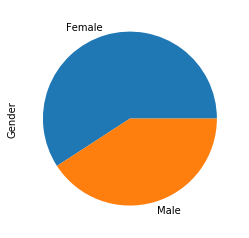

In [52]:
df['Gender'].value_counts().plot(kind='pie')

In [53]:
df['Gender'].value_counts(normalize=True)

Female    0.591607
Male      0.408393
Name: Gender, dtype: float64

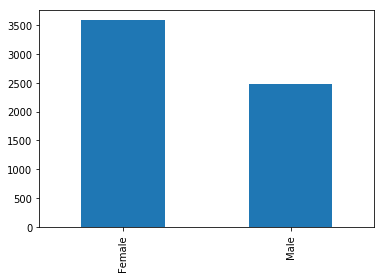

In [54]:
df['Gender'].value_counts().plot(kind='bar')

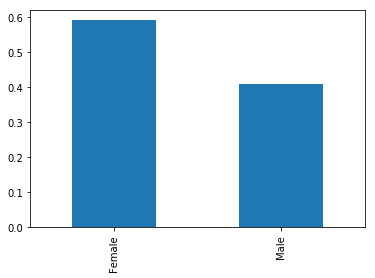

In [55]:
df['Gender'].value_counts(normalize=True).plot(kind='bar')

In [57]:
new_df['Size'].min()

81

Conclusion:
1. All the Images are greter than equal to 81
2. 60% sample data is female and 40% is male

### Resizing all Images to 100 X 100:

In [64]:
image_path = df['Path'][0]
image_path

'./Data/Crop/Male-Crop\\male_0.png'

In [65]:
#Read the Image
def resize_img(image_path):
    image_path = df['Path'][0]
    
    img = cv2.imread(image_path)
    #Convert to Grayscale
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #Resize into 100 X 100
    #Find size and apply correct interpolation technique
    size = gray_img.shape[0]

    if size<= 100:
        gray_re = cv2.resize(gray_img,(100,100),cv2.INTER_CUBIC) #Enlarge
    else:
        gray_re = cv2.resize(gray_img,(100,100),cv2.INTER_AREA) #Shrink
    
    #Flatten Image
    flat_img = gray_re.flatten()
    return flat_img

In [66]:
resize_img(path[0])

array([106, 100,  81, ...,  29,  31,  31], dtype=uint8)

In [68]:
len(resize_img(path[0]))

10000

<b>Apply resize and gender function to dataframe:<b>

In [69]:
new_df.head()

,Path,Size
0,./Data/Crop/Male-Crop\male_0.png,182
1,./Data/Crop/Male-Crop\male_1.png,81
2,./Data/Crop/Male-Crop\male_1003.png,81
3,./Data/Crop/Male-Crop\male_1005.png,122
4,./Data/Crop/Male-Crop\male_1007.png,273


In [70]:
new_df['Gender'] = new_df['Path'].apply(gender)
new_df.head()

e:\users\user.desktop-3hhgvth\anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Path,Size,Gender
0,./Data/Crop/Male-Crop\male_0.png,182,Male
1,./Data/Crop/Male-Crop\male_1.png,81,Male
2,./Data/Crop/Male-Crop\male_1003.png,81,Male
3,./Data/Crop/Male-Crop\male_1005.png,122,Male
4,./Data/Crop/Male-Crop\male_1007.png,273,Male


In [71]:
new_df.tail()

,Path,Size,Gender
6048,./Data/Crop/Female-Crop\female_994.png,182,Female
6049,./Data/Crop/Female-Crop\female_995.png,81,Female
6050,./Data/Crop/Female-Crop\female_997.png,122,Female
6051,./Data/Crop/Female-Crop\female_998.png,182,Female
6052,./Data/Crop/Female-Crop\female_999.png,182,Female


In [72]:
#Resize
new_df['Structured_Data'] = new_df['Path'].apply(resize_img)

e:\users\user.desktop-3hhgvth\anaconda3\envs\opencv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
new_df.head()

,Path,Size,Gender,Structured_Data
0,./Data/Crop/Male-Crop\male_0.png,182,Male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."
1,./Data/Crop/Male-Crop\male_1.png,81,Male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."
2,./Data/Crop/Male-Crop\male_1003.png,81,Male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."
3,./Data/Crop/Male-Crop\male_1005.png,122,Male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."
4,./Data/Crop/Male-Crop\male_1007.png,273,Male,"[106, 100, 81, 69, 71, 48, 51, 55, 41, 17, 30,..."


In [74]:
new_df['Gender'].value_counts()

Female    3242
Male      2202
Name: Gender, dtype: int64

<b>Form new dataframe<b>

In [77]:
df1 = new_df['Structured_Data'].apply(pd.Series)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
1,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
2,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
3,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31
4,106,100,81,69,71,48,51,55,41,17,...,17,18,26,28,31,30,31,29,31,31


In [78]:
df2 = pd.concat((new_df['Gender'],df1),axis=1)
df2.head()

,Gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
1,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
2,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
3,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
4,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31


In [83]:
df2.loc[0].shape

(10001,)

<b>Visualize values of new DataFrame<b>

In [86]:
df2.loc[0][1:].values.reshape(100,100).astype('int')

array([[106, 100,  81, ...,  23,  20,  34],
       [104,  93,  54, ...,  28,  24,  32],
       [109,  89,  66, ...,  18,  26,  37],
       ...,
       [141, 144, 147, ...,  30,  32,  31],
       [143, 148, 151, ...,  29,  32,  31],
       [147, 151, 152, ...,  29,  31,  31]])

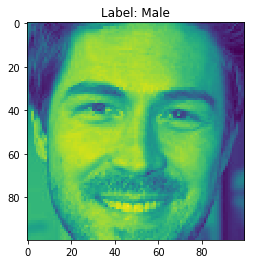

In [89]:
plt.title('Label: '+ df2.loc[0]['Gender'])
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'))

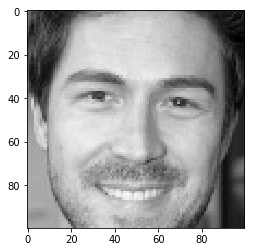

In [93]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')

<b>Save DataFrame in Pickle format<b>

In [90]:
import pickle

In [91]:
pickle.dump(df2,open('./Data/Dataframe_images_100_100.pickle', 'wb'))

In [92]:
#wb ->Signifies write bytes for writing data to file, rb->signifies read bytes for reading data to file